Install Library

In [11]:
%pip install pandas
%pip install plotly
%pip install matplotlib
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Import

In [12]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import re
from datetime import datetime, timedelta
import math

Read file

In [13]:
with open('/home/drasogun/DraSoGun/Work/CANSAT_UDUCK/Hardware/Data/log_testtemp.txt', 'r', encoding='utf-8', errors='replace') as f:
    text = f.read()

Clean Data

In [14]:
blocks = text.split('-------------')
print(blocks)
sec = -1
b = -1
data = []
vis = []
listxt = ('S','R','I',' ','.',',','-','0','1','2','3','4','5','6','7','8','9','\n',':')

for block in blocks:
    b += 1
    ch = 1
    for s in block:
        if s not in listxt:
            ch = 0
            break
    vis.append(ch)
for x in vis:
    print(x,end=" ")

['\n-\n12290300\n-\n-\n-\n9999\n0\n\n28.52\n1008.40\n40.48\n54.38\n\n1.00,-9.89,1.06\n1.05,1.02,-3.66\n-83.89,-5.75\n\nRSSI : -70\n2025-05-27 19:29:01\n', '\n-\n12290300\n-\n-\n-\n9999\n0\n\n28.53\n1008.36\n40.81\n54.39\n\n0.55,-10.05,0.71\n-0.05,0.95,1.31\n-85.97,-3.10\n\nRSSI : -73\n2025-05-27 19:29:03\n', '\n-\n12290500\n-\n-\n-\n9999\n0\n\n28.54\n1008.37\n40.72\n54.39\n\n0.82,-9.63,0.91\n-0.69,0.78,-0.75\n-84.59,-4.85\n\nRSSI : -71\n2025-05-27 19:29:05\n', '\n-\n12290700\n-\n-\n-\n9999\n0\n\n28.56\n1008.38\n40.66\n54.39\n\n0.58,-9.59,0.89\n0.15,1.10,-1.62\n-84.68,-3.43\n\nRSSI : -70\n2025-05-27 19:29:06\n', '\n-\n12290800\n-\n-\n-\n9999\n0\n\n28.58\n1008.35\n40.88\n54.38\n\n0.60,-9.74,0.57\n0.53,0.86,-2.44\n-86.68,-3.54\n\nRSSI : -72\n2025-05-27 19:29:08\n', '\n-\n12291000\n-\n-\n-\n9999\n0\n\n28.60\n1008.34\n40.92\n54.40\n\n0.65,-9.68,0.85\n-0.84,0.92,0.62\n-85.01,-3.83\n\nRSSI : -74\n2025-05-27 19:29:10\n', '\n-\n12291200\n-\n-\n-\n9999\n0\n\n28.63\n1008.37\n40.67\n54.40\n\n0.67,

Add Data

In [15]:
blocks = text.split('-------------')
sec = -1
b = -1
data = []
vis = []
listxt = ('S','R','I',' ','.',',','-','0','1','2','3','4','5','6','7','8','9','\n',':')

for block in blocks:
    b += 1
    ch = 1
    for s in block:
        if s not in listxt:
            ch = 0
            break
    vis.append(ch)
for block in blocks:
    sec += 1
    if not vis[sec]:
        data.append({
            'second': sec,
            'Time': float('nan'),
            'Latitude': float('nan'),
            'Longitude': float('nan'),
            'Speed': float('nan'),
            'Course': float('nan'),
            'Altitude_GPS': float('nan'),
            'HDOP': float('nan'),
            'Satellite': float('nan'),
            'Temp': float('nan'),
            'Pressure': float('nan'),
            'Altitude_BME280': float('nan'),
            'Humidity': float('nan'),
            'Acc_x': float('nan'),
            'Acc_y': float('nan'),
            'Acc_z': float('nan'),
            'Gyro_x': float('nan'),
            'Gyro_y': float('nan'),
            'Gyro_z': float('nan'),
            'Roll': float('nan'),
            'Pitch': float('nan'),
            'Tilted_x': float('nan'),
            'Tilted_y': float('nan'),
            'RSSI': float('nan')
        })
        continue
    lines = [l.strip() for l in block.splitlines() if l.strip()]
    if len(lines) < 16:
        continue
    # receive data
    latlon = lines[0]
    raw_time = lines[1]
    sp     = lines[2]
    cu     = lines[3]
    altg   = lines[4]
    hdop   = lines[5]
    sat    = lines[6]
    tmp    = lines[7]
    hPa    = lines[8]
    altb   = lines[9]
    hm     = lines[10]
    acc    = lines[11]
    gyro   = lines[12]
    mag    = lines[13]
    rssi   = lines[14]
    dt     = lines[15]
    #tranform data
    if latlon == '-':
        lat = lon = float('nan')
    else:
        lat, lon = map(float, latlon.split(','))
    def f(x): return float(x) if x != '-' else float('nan')
    def i(x): return int(x)   if x != '-' else None

    sp   = f(sp)
    cu   = f(cu)
    altg = f(altg)
    hdop = i(hdop)
    sat  = i(sat)
    tmp  = f(tmp)
    hPa  = f(hPa)
    altb = f(altb)
    hm   = f(hm)

    ax, ay, az = map(float, acc.split(','))
    gx, gy, gz = map(float, gyro.split(','))
    roll, pitch     = map(float, mag.split(','))
    mx = roll
    my = pitch
    if sec == 0:
        fmx = mx
        fmy = my
        mx = 0
        my = 0
    else:
        mx = abs(mx) - abs(fmx)
        my = abs(my) - abs(fmy)
    rssi = int(rssi.split(':')[1].strip())
    #updata on data var
    data.append({
        'second': sec,
        'Time': dt,
        'Latitude': lat,
        'Longitude': lon,
        'Speed': sp,
        'Course': cu,
        'Altitude_GPS': altg,
        'HDOP': hdop,
        'Satellite': sat,
        'Temp': tmp,
        'Pressure': hPa,
        'Altitude_BME280': altb,
        'Humidity': hm,
        'Acc_x': ax,
        'Acc_y': ay,
        'Acc_z': az,
        'Gyro_x': gx,
        'Gyro_y': gy,
        'Gyro_z': gz,
        'Roll': roll,
        'Pitch': pitch,
        'Tilted_x': mx,
        'Tilted_y': my,
        'RSSI': rssi
    })

Data Fram

In [16]:
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [17]:
df = pd.DataFrame(data)
df

,second,Time,Latitude,Longitude,Speed,Course,Altitude_GPS,HDOP,Satellite,Temp,Pressure,Altitude_BME280,Humidity,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,Roll,Pitch,Tilted_x,Tilted_y,RSSI
0,0,2025-05-27 19:29:01,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,28.52,1008.40,40.48,54.38,1.00,-9.89,1.06,1.05,1.02,-3.66,-83.89,-5.75,0.00,0.00,-70.0
1,1,2025-05-27 19:29:03,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,28.53,1008.36,40.81,54.39,0.55,-10.05,0.71,-0.05,0.95,1.31,-85.97,-3.10,2.08,-2.65,-73.0
2,2,2025-05-27 19:29:05,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,28.54,1008.37,40.72,54.39,0.82,-9.63,0.91,-0.69,0.78,-0.75,-84.59,-4.85,0.70,-0.90,-71.0
3,3,2025-05-27 19:29:06,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,28.56,1008.38,40.66,54.39,0.58,-9.59,0.89,0.15,1.10,-1.62,-84.68,-3.43,0.79,-2.32,-70.0
4,4,2025-05-27 19:29:08,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,28.58,1008.35,40.88,54.38,0.60,-9.74,0.57,0.53,0.86,-2.44,-86.68,-3.54,2.79,-2.21,-72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,1622,2025-05-27 20:15:50,8.368141,100.043923,105.0,0.0,-1040.0,675.0,4.0,47.97,1008.28,41.48,44.01,-4.58,-9.89,1.26,-17.23,-55.65,41.81,-82.74,24.71,-1.15,18.96,-56.0
1623,1623,2025-05-27 20:15:51,8.368094,100.043987,87.0,0.0,500.0,124.0,6.0,47.91,1008.27,41.56,43.99,-4.22,-7.35,3.54,-28.76,-50.56,11.85,-64.25,27.34,-19.64,21.59,-50.0
1624,1624,2025-05-27 20:15:53,8.368120,100.044004,75.0,0.0,550.0,278.0,5.0,47.88,1008.25,41.70,43.99,-1.24,-7.86,2.60,-30.08,-51.98,-63.35,-71.70,8.54,-12.19,2.79,-63.0
1625,1625,2025-05-27 20:15:55,8.368127,100.044018,72.0,0.0,420.0,278.0,5.0,47.84,1008.32,41.22,43.95,0.36,-9.63,0.74,0.17,1.13,-1.46,-85.62,-2.14,1.73,-3.61,-49.0


Plot graph

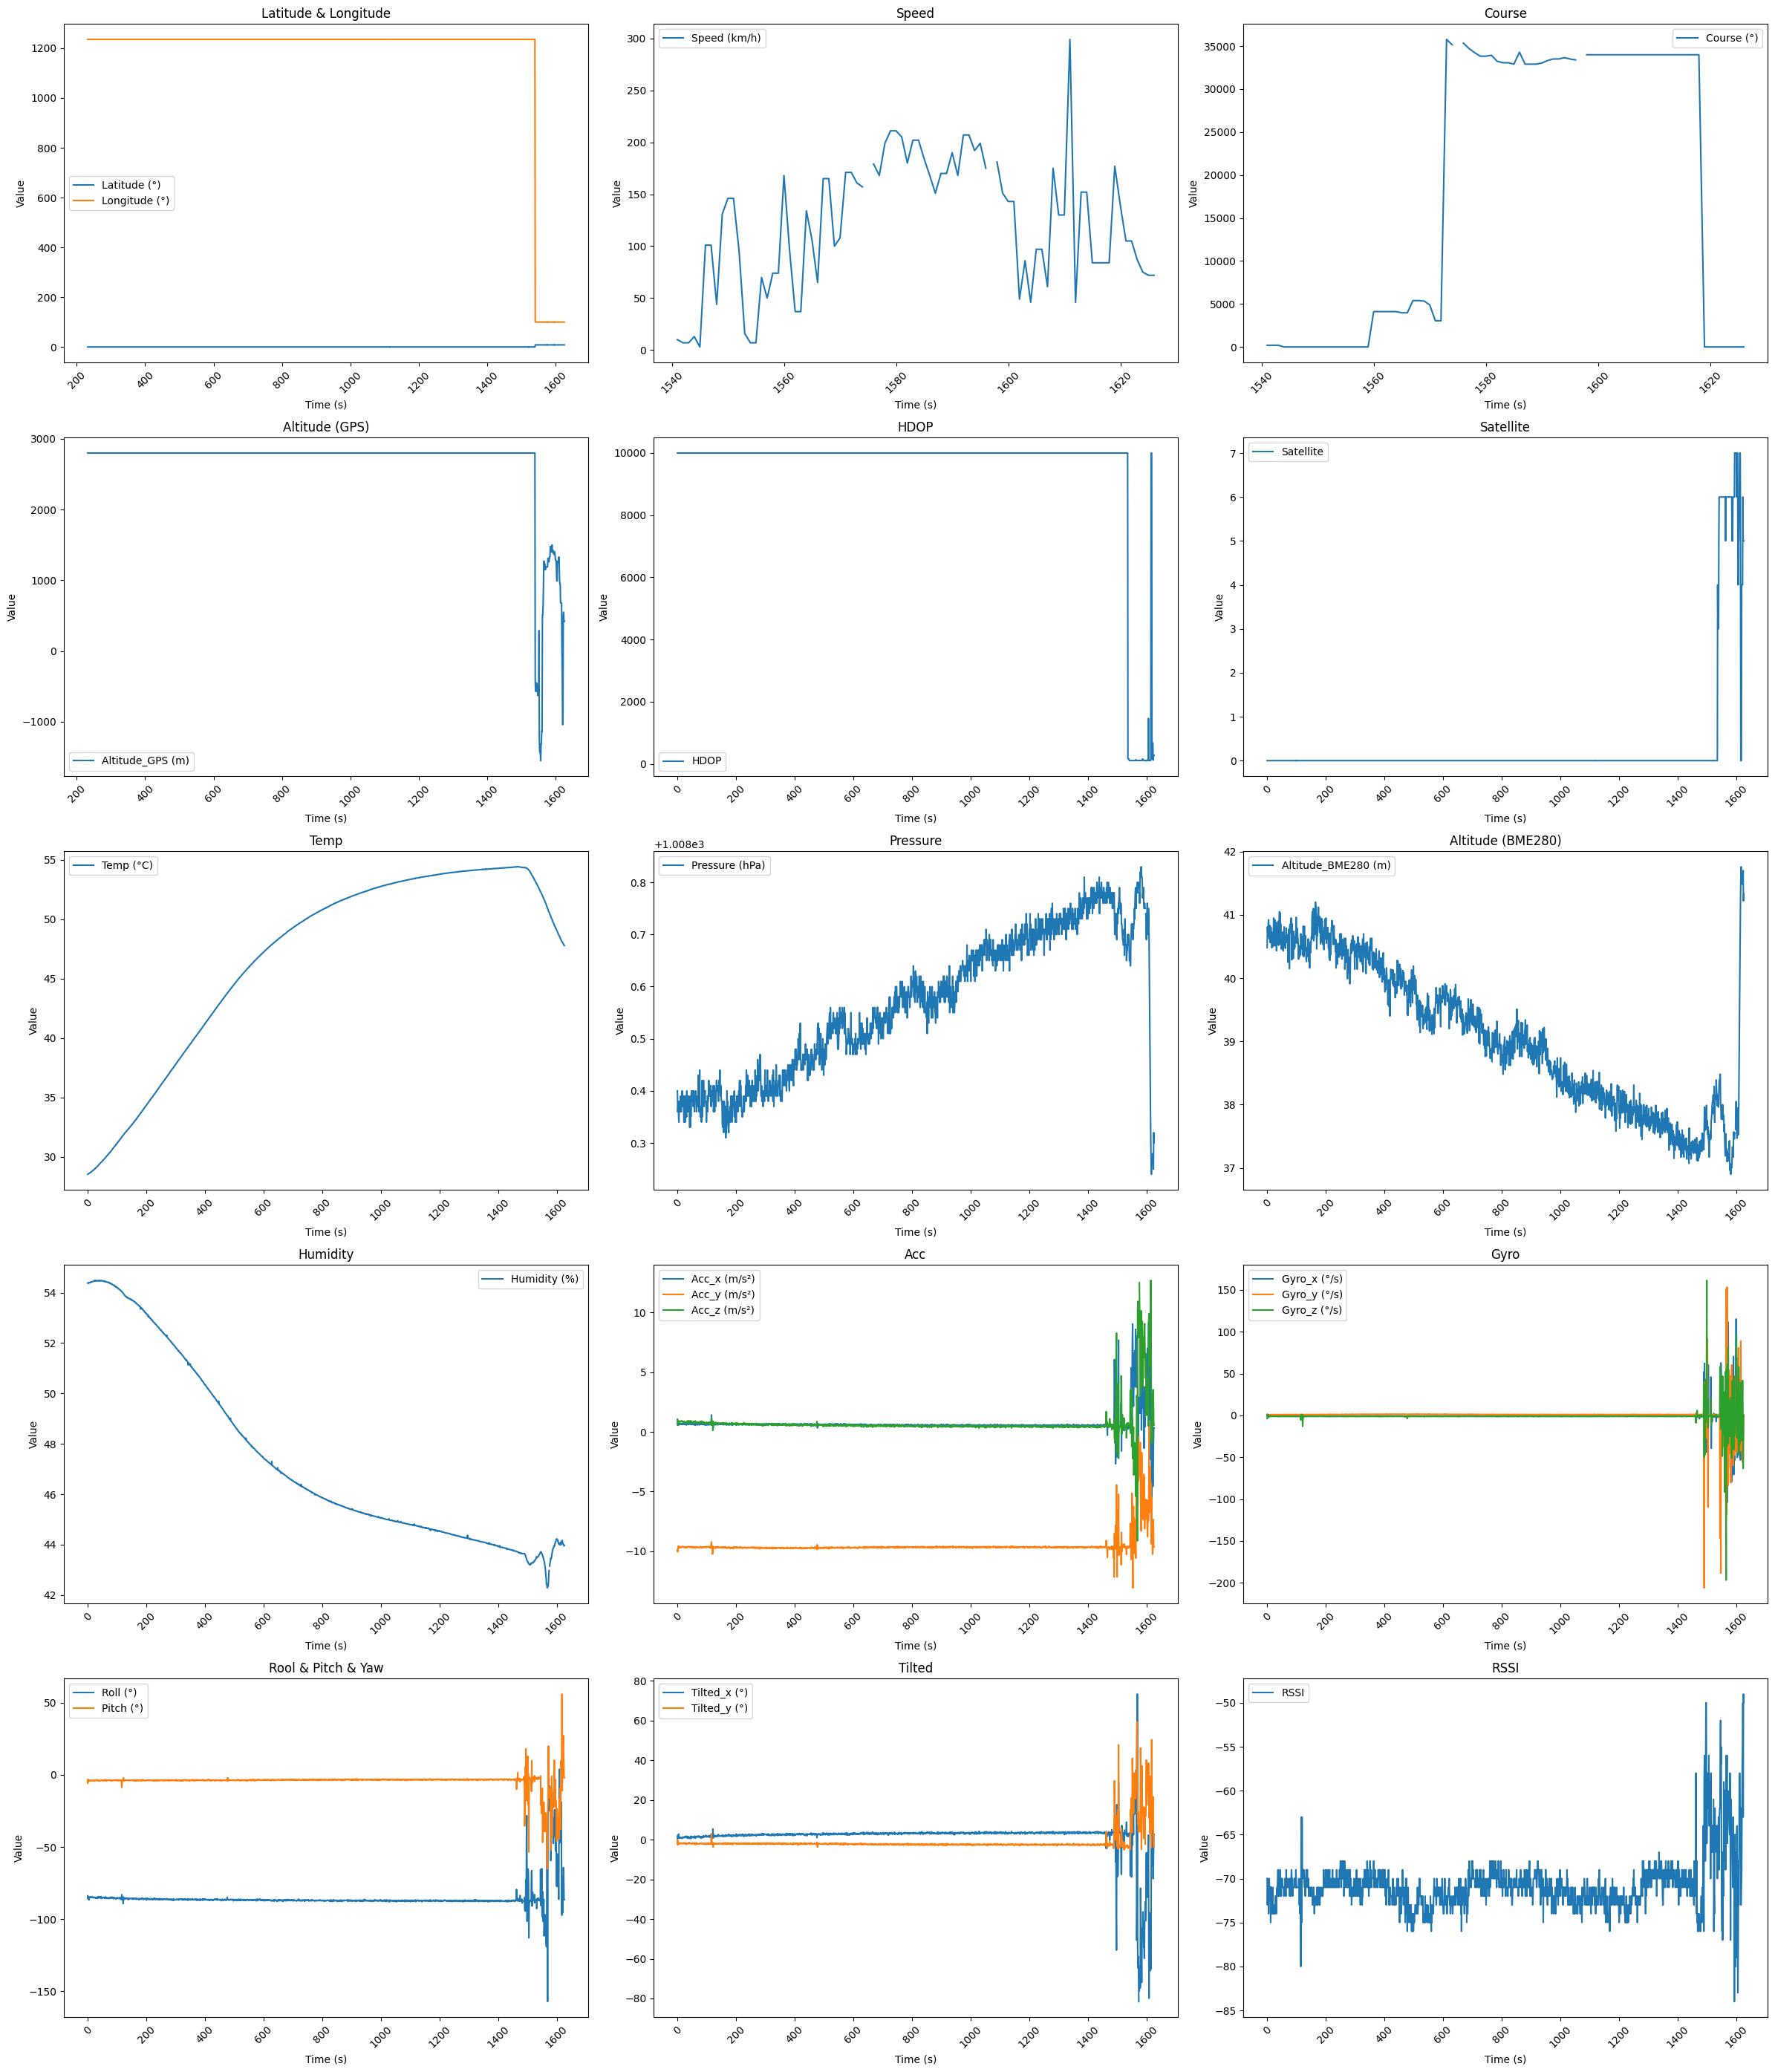

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 3,figsize=(24, 28))
ax1, ax2, ax3, ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15 = axes.flatten()

# Latitude & Longitude
ax1.plot(df['second'], df['Latitude'], label='Latitude (°)')
ax1.plot(df['second'], df['Longitude'], label='Longitude (°)')
ax1.set_title('Latitude & Longitude')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Value')
ax1.legend()

# Speed
ax2.plot(df['second'], df['Speed'], label='Speed (km/h)')
ax2.set_title('Speed')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Value')
ax2.legend()

# Course
ax3.plot(df['second'], df['Course'], label='Course (°)')
ax3.set_title('Course')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Value')
ax3.legend()

# Altitude_GPS
ax4.plot(df['second'], df['Altitude_GPS'], label='Altitude_GPS (m)')
ax4.set_title('Altitude (GPS)')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Value')
ax4.legend()

# HDOP	
ax5.plot(df['second'], df['HDOP'], label='HDOP')
ax5.set_title('HDOP')
ax5.set_xlabel('Time (s)')
ax5.set_ylabel('Value')
ax5.legend()

# Satellite
ax6.plot(df['second'], df['Satellite'], label='Satellite')
ax6.set_title('Satellite')
ax6.set_xlabel('Time (s)')
ax6.set_ylabel('Value')
ax6.legend()

# Temp
ax7.plot(df['second'], df['Temp'], label='Temp (°C)')
ax7.set_title('Temp')
ax7.set_xlabel('Time (s)')
ax7.set_ylabel('Value')
ax7.legend()

# Pressure
ax8.plot(df['second'], df['Pressure'], label='Pressure (hPa)')
ax8.set_title('Pressure')
ax8.set_xlabel('Time (s)')
ax8.set_ylabel('Value')
ax8.legend()

# Altitude_BME280
ax9.plot(df['second'], df['Altitude_BME280'], label='Altitude_BME280 (m)')
ax9.set_title('Altitude (BME280)')
ax9.set_xlabel('Time (s)')
ax9.set_ylabel('Value')
ax9.legend()

# Humidity
ax10.plot(df['second'], df['Humidity'], label='Humidity (%)')
ax10.set_title('Humidity')
ax10.set_xlabel('Time (s)')
ax10.set_ylabel('Value')
ax10.legend()

# Acc
ax11.plot(df['second'], df['Acc_x'], label='Acc_x (m/s²)')
ax11.plot(df['second'], df['Acc_y'], label='Acc_y (m/s²)')
ax11.plot(df['second'], df['Acc_z'], label='Acc_z (m/s²)')
ax11.set_title('Acc')
ax11.set_xlabel('Time (s)')
ax11.set_ylabel('Value')
ax11.legend()

# Gyro
ax12.plot(df['second'], df['Gyro_x'], label='Gyro_x (°/s)')
ax12.plot(df['second'], df['Gyro_y'], label='Gyro_y (°/s)')
ax12.plot(df['second'], df['Gyro_z'], label='Gyro_z (°/s)')
ax12.set_title('Gyro')
ax12.set_xlabel('Time (s)')
ax12.set_ylabel('Value')
ax12.legend()

# Roll Pitch Yaw
ax13.plot(df['second'], df['Roll'], label='Roll (°)')
ax13.plot(df['second'], df['Pitch'], label='Pitch (°)')
ax13.set_title('Rool & Pitch & Yaw')
ax13.set_xlabel('Time (s)')
ax13.set_ylabel('Value')
ax13.legend()

# Tilted
ax14.plot(df['second'], df['Tilted_x'], label='Tilted_x (°)')
ax14.plot(df['second'], df['Tilted_y'], label='Tilted_y (°)')
ax14.set_title('Tilted')
ax14.set_xlabel('Time (s)')
ax14.set_ylabel('Value')
ax14.legend()

# RSSI
ax15.plot(df['second'], df['RSSI'], label='RSSI')
ax15.set_title('RSSI')
ax15.set_xlabel('Time (s)')
ax15.set_ylabel('Value')
ax15.legend()

# หมุน tick labels ทุกกราฟ
for ax in axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)

fig.tight_layout()
plt.show()


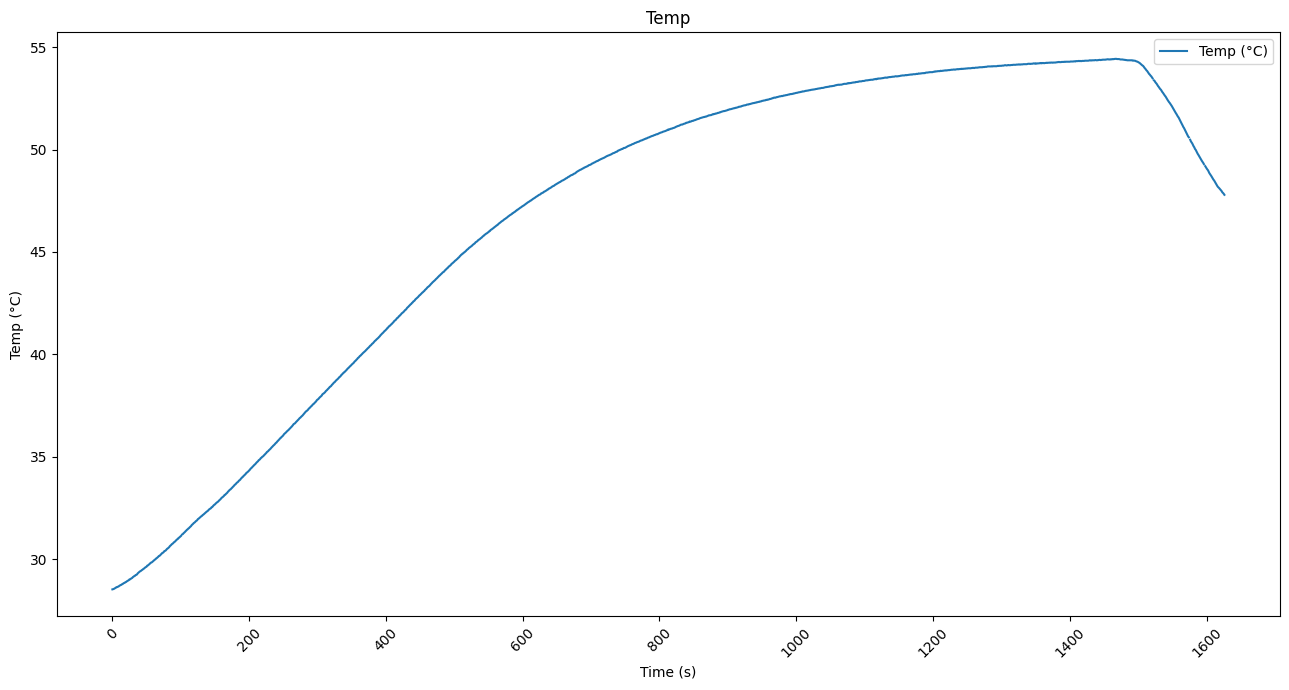

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1,figsize=(13,7))

ax.plot(df['second'], df['Temp'], label='Temp (°C)')
ax.set_title('Temp')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Temp (°C)')
ax.legend()
for label in ax.get_xticklabels():
    label.set_rotation(45)

fig.tight_layout()
plt.show()


Map

In [20]:
fig = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    hover_name="second",
    zoom=12,
    height=600,
    mapbox_style="open-street-map"
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


/tmp/ipykernel_351149/3317165664.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

